## Problem Statement - We are going to visualize how the used phones/gadgets selling price varies with number of factors given in the dataset.

##We have loaded the dataset which is in csv format using pandas and that's how our dataset looks like


Comprehensive Data Analysis and Visualization of Mobile Phone Features to Predict Used Prices
This project involves a detailed analysis and visualization of a dataset containing various features of mobile phones to predict their used prices. The dataset includes 15 numerical features and 4 categorical features. Here are the steps and insights obtained from the analysis:

Dataset Features:
Numerical Features:
screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, new_price, used_price, price_drop, price_drop_range, days_used_bins, days_used_rounded
Categorical Features:
brand_name, os, 4g, 5g
Data Analysis and Visualization:
Exploratory Data Analysis (EDA):
Analyzed the dataset to understand the distribution, trends, and patterns within the data.
Identified and handled missing values by filling them with appropriate statistics such as mean, median, or mode.
Histograms and KDE Plots: Visualized the distribution of numerical features to understand their spread and central tendency.
Pairplot: Examined pairwise relationships between numerical features, identifying patterns and correlations.
Correlation Heatmap: Identified highly correlated features with 'used_price' to understand their relationships.
Boxplots: Visualized the distribution of numerical features grouped by categorical variables.
Bar Plots: Showed the frequency of each category in categorical features.
Count Plots and Stacked Bar Plots: Illustrated the distribution and count of categorical features across different categories.
Key Insights:
Correlation Analysis: Identified which numerical features are most correlated with the target variable 'used_price'.
Feature Importance: Used machine learning models to determine the importance of each feature in predicting 'used_price'.
Distribution Analysis: Examined the distribution of 'used_price' and other numerical features to identify outliers or unusual patterns.
Categorical Analysis: Analyzed the distribution of categorical features and their impact on 'used_price'.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
df = pd.read_csv(r"C:\Users\hp\Desktop\used_device_data.csv")
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.81,154.12
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46


## Checking for null values present in our data set or not


In [7]:
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

## we had null values in multiple feautres and they all are mostly categorical type so we replaced the null values with Mode of the respective column.

In [8]:

mode_value = df['main_camera_mp'].mode()[0]
df['main_camera_mp'].fillna(mode_value, inplace=True)

mode_value1 = df['selfie_camera_mp'].mode()[0]
df['selfie_camera_mp'].fillna(mode_value1, inplace=True)

mode_value2 = df['int_memory'].mode()[0]
df['int_memory'].fillna(mode_value2, inplace=True)

mode_value3 = df['ram'].mode()[0]
df['ram'].fillna(mode_value3, inplace=True)

mode_value4 = df['battery'].mode()[0]
df['battery'].fillna(mode_value4, inplace=True)

mode_value5 = df['weight'].mode()[0]
df['weight'].fillna(mode_value5, inplace=True)


## check if any duplicate row present or not , we found no duplicates , to view if present any duplicate row we

In [9]:


# To see all duplicate rows
#->duplicate_rows = df[duplicates]
#->print(duplicate_rows)

# To remove duplicates and keep the first occurrence
#->df_no_duplicates = df.drop_duplicates()

# To remove duplicates and keep the last occurrence
#->df_no_duplicates_last = df.drop_duplicates(keep='last')

# If you want to reset the index after removing duplicates
#->df_no_duplicates.reset_index(drop=True, inplace=True)

duplicates = df.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 0


## Checking for number of numerical and categorical feautres in our dataset

In [10]:


numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

num_numerical_features = len(numerical_features)
num_categorical_features = len(categorical_features)

print(f'Number of numerical features: {num_numerical_features}')
print(f'Number of categorical features: {num_categorical_features}')


Number of numerical features: 11
Number of categorical features: 4


In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'new_price', 'used_price']

We have 4 categorical features : ['brand_name', 'os', '4g', '5g']


## Adding one more column as price_drop with respect to used price and current price of the gadget in %

In [12]:
df['price_drop'] = ((df['new_price'] - df['used_price']) / df['new_price']) * 100
df['price_drop'] = df['price_drop'].round().astype(int)

## Adding one more column called as price drop range which has values 0,1,2,3 '0 represents price drop of 0-25% , 1 represents price drop of 25-50% , 2 represents price drop of 50-75%, 3 represents price drop of 75%+

In [13]:


# Create bins and labels for different discount ranges
bins = [-float('inf'), 25, 50, 75, float('inf')]
labels = [0, 1, 2, 3]

# Create a new column based on discount ranges
df['price_drop_range'] = pd.cut(df['price_drop'], bins=bins, labels=labels, right=False).astype(int)



## We can vusualize our updated data set

In [14]:
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,price_drop,price_drop_range
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,33,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,30,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,54,2
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,39,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,13.0,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33,86,3
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.81,154.12,70,2
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05,16,0
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46,24,0


## describing my dataset

In [15]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,price_drop,price_drop_range
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.643654,6.553329,54.528428,4.036080,3134.908078,182.685495,2015.965258,674.869716,237.038848,92.302936,55.118413,1.723798
std,3.805280,4.754206,6.968453,84.933275,1.364314,1299.054664,88.335850,2.298455,248.580166,194.302782,54.701648,16.114801,0.705057
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,18.200000,4.650000,2.000000,0.000000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,120.342500,56.482500,45.000000,1.000000
50%,12.830000,10.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,189.785000,81.870000,57.000000,2.000000
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,291.115000,116.245000,66.000000,2.000000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,2560.200000,749.520000,91.000000,3.000000


## Calculating count of each category for price drop range and Visualizing using seaborn and matplotlib by pie chart & Bar chart

In [16]:
category_counts = df['price_drop_range'].value_counts()
category_counts

price_drop_range
2    1996
1     945
3     339
0     174
Name: count, dtype: int64

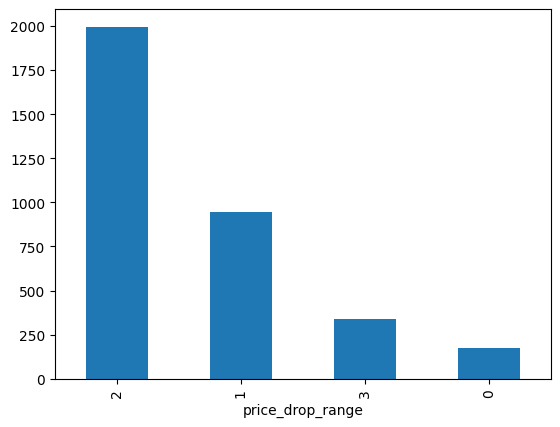

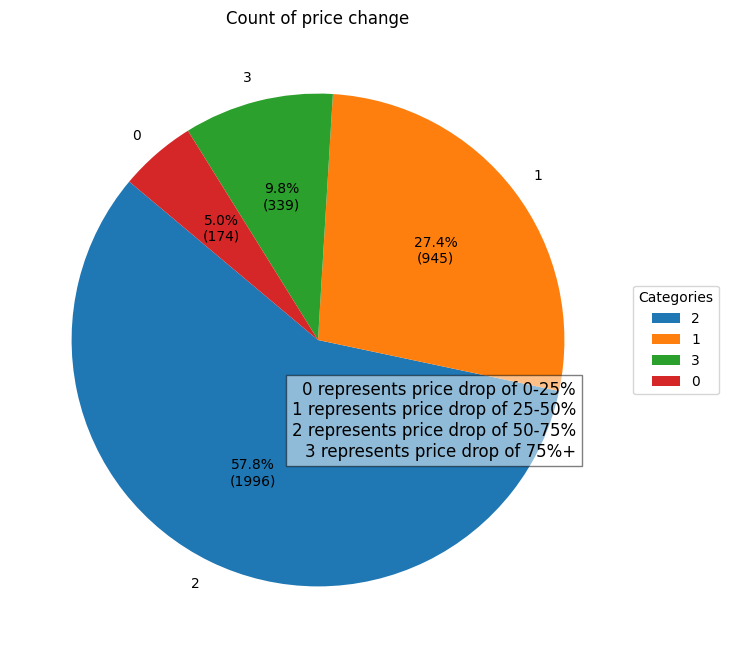

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
ax = category_counts.plot(kind='bar', stacked=False)
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(category_counts, labels=category_counts.index, autopct=autopct_format(category_counts), startangle=140)
plt.legend(wedges, category_counts.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.text(
    1, 0.5,
    '0 represents price drop of 0-25%\n1 represents price drop of 25-50%\n2 represents price drop of 50-75%\n3 represents price drop of 75%+', 
    ha='right', va='center', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5)
)
plt.title('Count of price change')
plt.show()

##We can cleary say the most of the gadgets are in 50-75% lesser than the current value 

## We are now visualizing the price drop of the gadgets with respect to Operating system of the Gadgets.

In [18]:
category_counts_1 = df.groupby(['os', 'price_drop_range']).size().unstack(fill_value=0)
category_counts_1


price_drop_range,0,1,2,3
os,,,,
Android,161,883,1860,310
Others,13,47,71,6
Windows,0,14,47,6
iOS,0,1,18,17


<Figure size 1000x600 with 0 Axes>

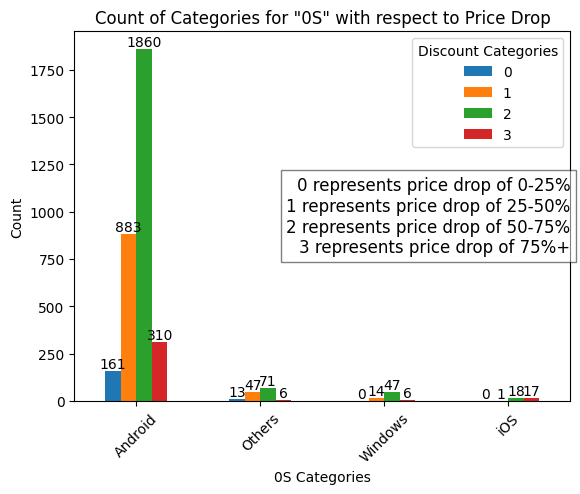

In [19]:
plt.figure(figsize=(10, 6))
ax = category_counts_1.plot(kind='bar', stacked=False)
plt.xlabel('0S Categories')
plt.ylabel('Count')
plt.title('Count of Categories for "0S" with respect to Price Drop')
plt.text(
    1, 0.5,
    '0 represents price drop of 0-25%\n1 represents price drop of 25-50%\n2 represents price drop of 50-75%\n3 represents price drop of 75%+', 
    ha='right', va='center', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5)
)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(title="Discount Categories")
plt.xticks(rotation=45)
plt.show()

##We can clearly visualize the most of the android operating system are in range of 50-75% discount  

## We are now visualizing the price drop of the gadgets with respect to the release year of the Gadgets.

In [20]:
category_counts_2 = df.groupby(['release_year', 'price_drop_range']).size().unstack(fill_value=0)
category_counts_2


price_drop_range,0,1,2,3
release_year,,,,
2013,19,88,381,82
2014,9,115,434,84
2015,16,120,336,43
2016,16,119,229,19
2017,10,111,153,25
2018,15,106,161,40
2019,48,178,189,31
2020,41,108,113,15


<Figure size 1000x600 with 0 Axes>

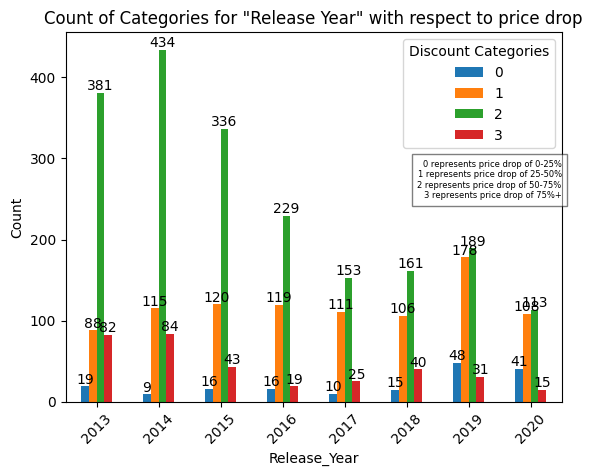

In [21]:

plt.figure(figsize=(10, 6))
ax = category_counts_2.plot(kind='bar', stacked=False)

plt.xlabel('Release_Year')
plt.ylabel('Count')
plt.title('Count of Categories for "Release Year" with respect to price drop')
plt.text(
    1, 0.6, 
    '0 represents price drop of 0-25%\n1 represents price drop of 25-50%\n2 represents price drop of 50-75%\n3 represents price drop of 75%+', 
    ha='right', va='center', transform=ax.transAxes, fontsize=6, bbox=dict(facecolor='white', alpha=0.5)
)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend(title="Discount Categories")
plt.xticks(rotation=45)
plt.show()

##We can visualize that gadgets that were released in 2014 are in most drop in price followed by 2013 and 2015.

## We are now visualizing the price drop of the gadgets with respect to the days used of the Gadgets.

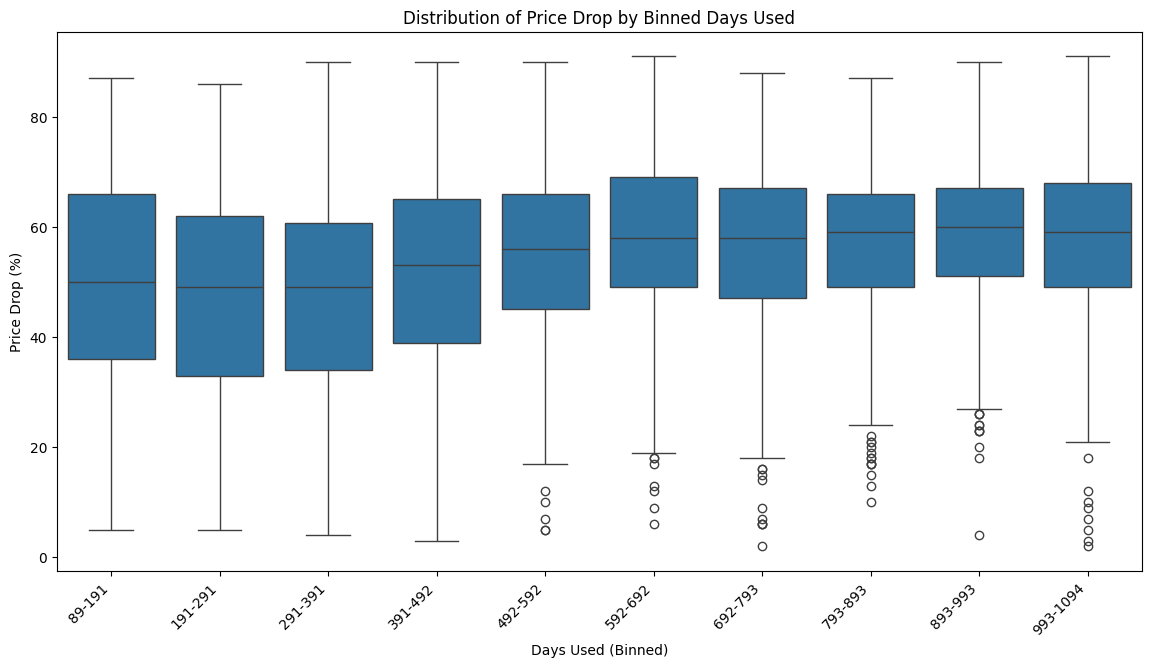

In [22]:

# Round off days_used to the nearest integer
df['days_used_rounded'] = df['days_used'].round().astype(int)

# Create bins for rounded days_used
# Determine the number of bins, you can adjust the number as needed
number_of_bins = 10
df['days_used_bins'] = pd.cut(df['days_used_rounded'], bins=number_of_bins)

# Box plot to visualize the distribution
plt.figure(figsize=(14, 7))
ax = sns.boxplot(data=df, x='days_used_bins', y='price_drop')

# Add labels and title
plt.xlabel('Days Used (Binned)')
plt.ylabel('Price Drop (%)')
plt.title('Distribution of Price Drop by Binned Days Used')

# Format the x-axis labels to show rounded bin edges
bin_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in df['days_used_bins'].cat.categories]
ax.set_xticklabels(bin_labels, rotation=45, ha='right')

# Display the plot
plt.show()


##We can visualize the outliers present also , and price change with respect to days used, as no of days used rises price change also rises which is obvious

## We are visualizing the brand of gadgets with most reduce in price for android operating system

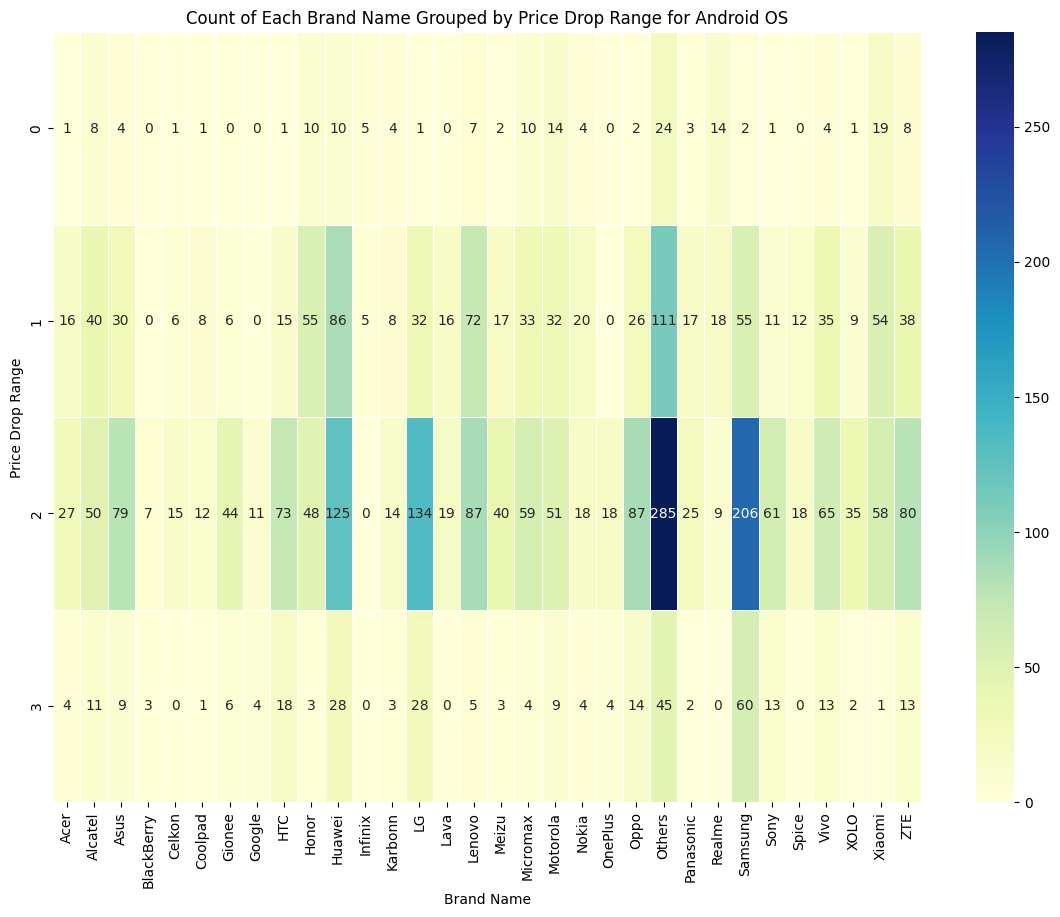

In [23]:

# Filter the DataFrame to include only rows where os is "android"
android_df = df[df['os'] == 'Android']

# Group by price_drop_range and brand_name and count the occurrences
grouped = android_df.groupby(['price_drop_range', 'brand_name']).size().unstack(fill_value=0)

# Plotting the results as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(grouped, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

# Add labels and title
plt.xlabel('Brand Name')
plt.ylabel('Price Drop Range')
plt.title('Count of Each Brand Name Grouped by Price Drop Range for Android OS')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



We can visualize that brand name with "others" has more in range of 50-75% price drop, and Samsung and LG has more price drop in range of 75%+ while for remaning categories it is equally distributed

## Visualizing distribution of data for every numerical categories

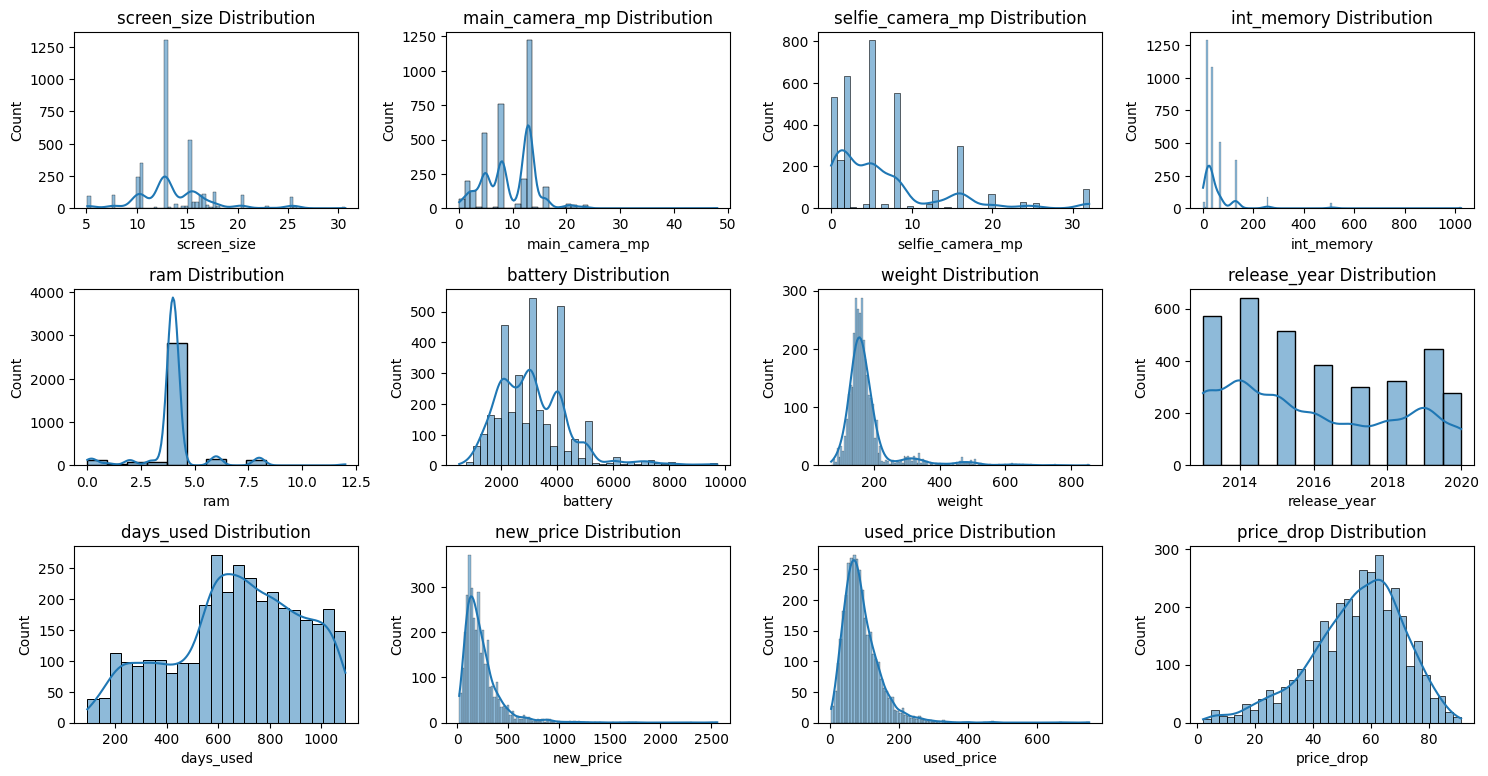

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms and KDE plots for numerical features
numerical_features = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'new_price', 'used_price', 'price_drop']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


##We can see that weight , new price and internal memory  feautres are Right Skewed and we have Normal Distribution for battery, price drop, screen size and ram feautres 

## We are finding correlation between feautres , how the feautres are correlated

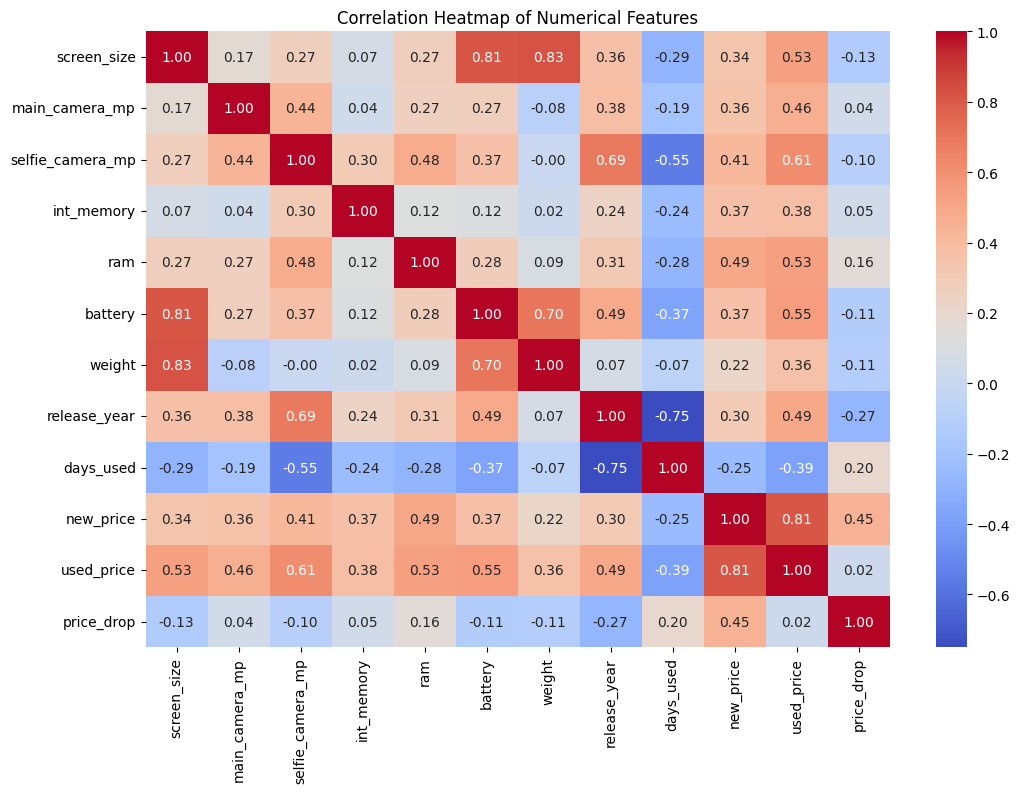

In [25]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [26]:
correlation_matrix = df[numerical_features].corr()
correlation_matrix

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,price_drop
screen_size,1.000000,0.168353,0.271615,0.072195,0.273810,0.810519,0.828893,0.364223,-0.291723,0.340895,0.529275,-0.129488
main_camera_mp,0.168353,1.000000,0.438985,0.040689,0.266467,0.272383,-0.083057,0.384425,-0.191985,0.356741,0.462210,0.044809
selfie_camera_mp,0.271615,0.438985,1.000000,0.296713,0.477191,0.368759,-0.004565,0.690661,-0.552377,0.413713,0.613598,-0.099455
int_memory,0.072195,0.040689,0.296713,1.000000,0.123406,0.117751,0.015635,0.235097,-0.242279,0.369410,0.378605,0.048159
ram,0.273810,0.266467,0.477191,0.123406,1.000000,0.279433,0.089900,0.313829,-0.279737,0.494048,0.528986,0.156593
battery,0.810519,0.272383,0.368759,0.117751,0.279433,1.000000,0.700078,0.487459,-0.368909,0.369994,0.548723,-0.114605
weight,0.828893,-0.083057,-0.004565,0.015635,0.089900,0.700078,1.000000,0.071583,-0.067891,0.219471,0.358261,-0.111638
release_year,0.364223,0.384425,0.690661,0.235097,0.313829,0.487459,0.071583,1.000000,-0.750390,0.303571,0.494910,-0.272493
days_used,-0.291723,-0.191985,-0.552377,-0.242279,-0.279737,-0.368909,-0.067891,-0.750390,1.000000,-0.246353,-0.385777,0.195728
new_price,0.340895,0.356741,0.413713,0.369410,0.494048,0.369994,0.219471,0.303571,-0.246353,1.000000,0.809335,0.449674


In [27]:
## Correlation of every feautres with used price as used price is our target variable
correlation_with_used_price = correlation_matrix['used_price'].sort_values(ascending=False)
print(correlation_with_used_price)

used_price          1.000000
new_price           0.809335
selfie_camera_mp    0.613598
battery             0.548723
screen_size         0.529275
ram                 0.528986
release_year        0.494910
main_camera_mp      0.462210
int_memory          0.378605
weight              0.358261
price_drop          0.016044
days_used          -0.385777
Name: used_price, dtype: float64


##We got to see that sceen size and battery feautres are highly correlated with each other , and screen size with weight also is highly correlated , and new price is highly correlated with used price which is obvious

## Box PLot to visualize the outliers for every numerical feautres

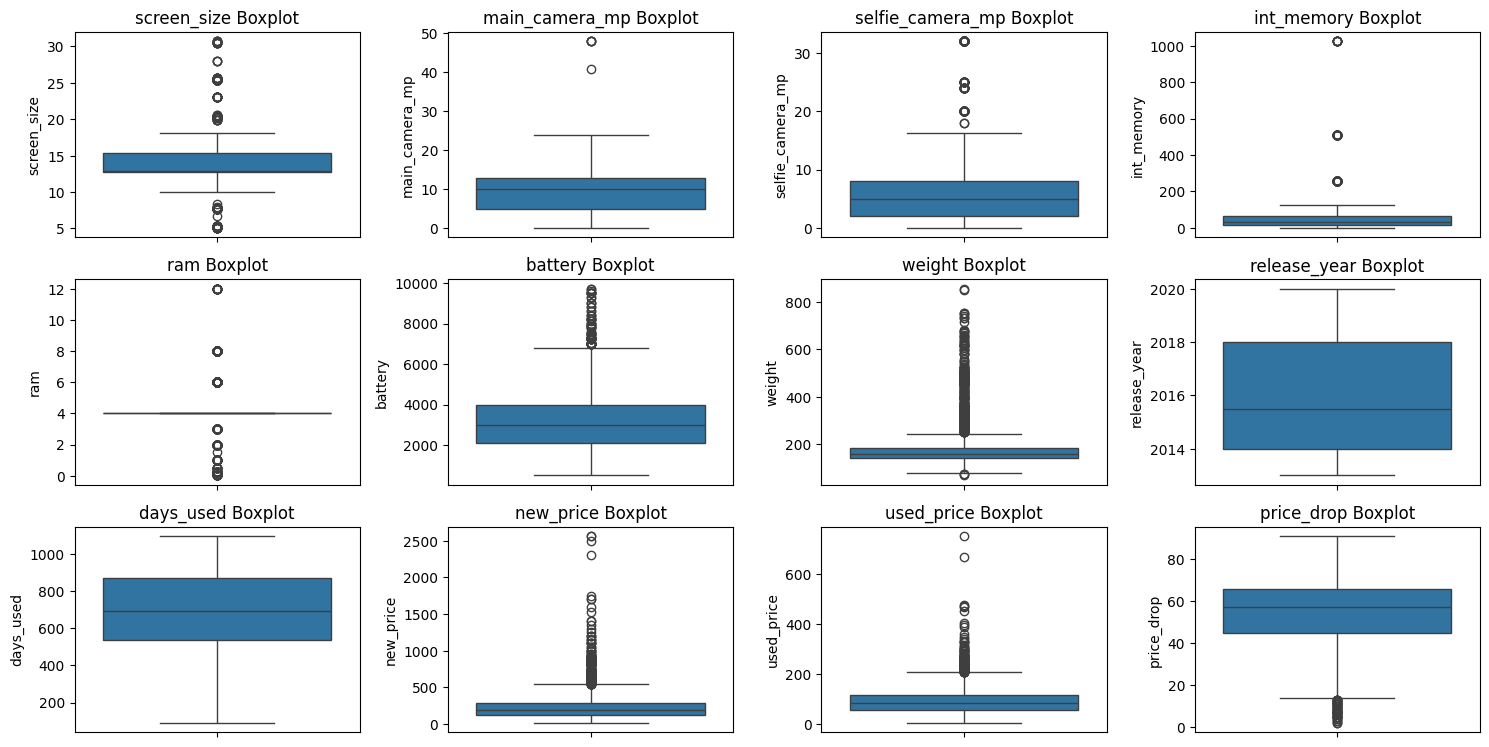

In [28]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(f'{feature} Boxplot')
plt.tight_layout()
plt.show()


## visualizing our Count of every categories of categorical feautres

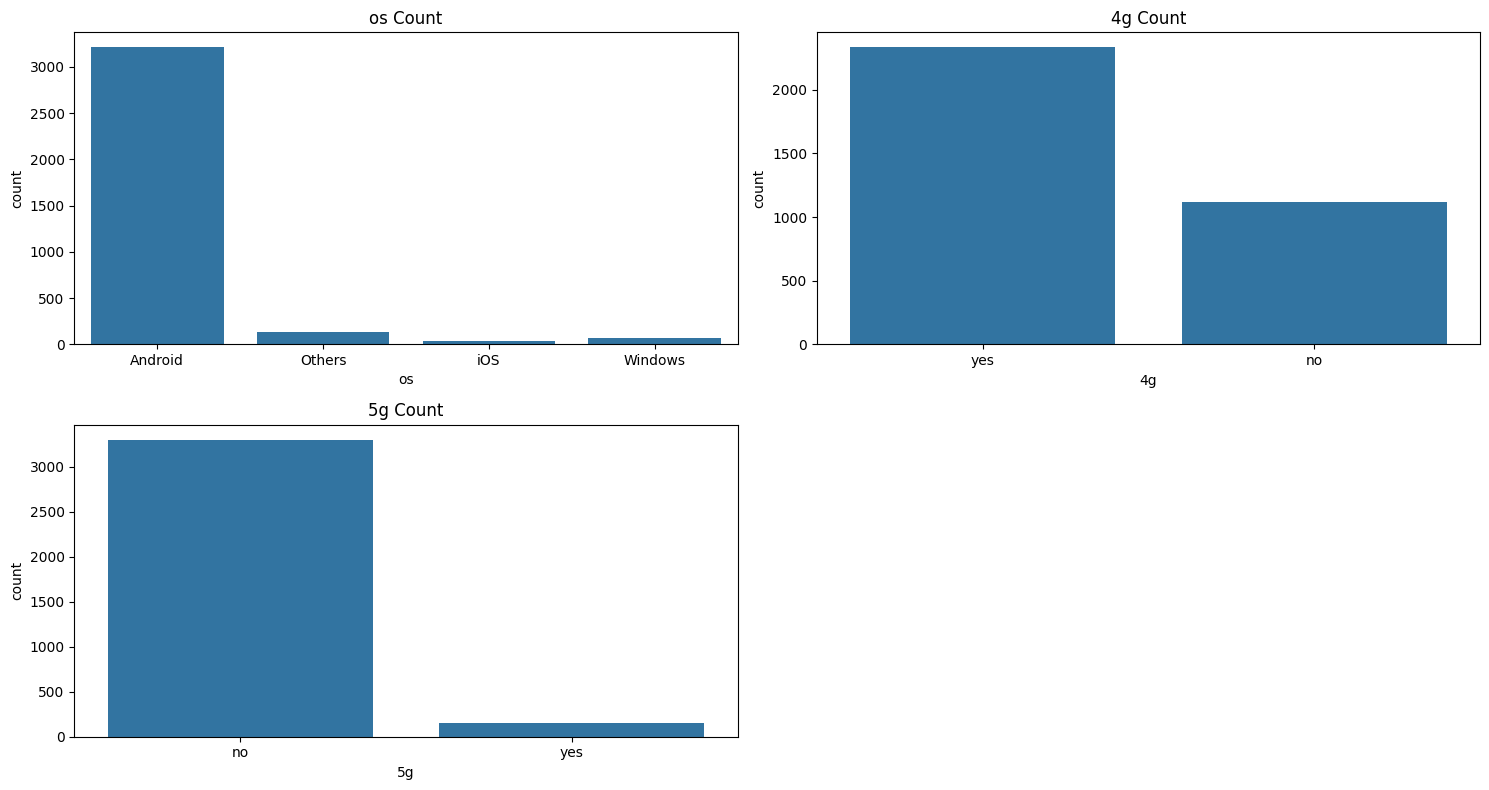

In [29]:
categorical_features = ['os', '4g', '5g']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'{feature} Count')
plt.tight_layout()
plt.show()


##Most are os with android and with 4g enabled gadgets but not 5g enabled

## Visualizing Most important Frautres which shows the importance of each numerical feature in predicting 'used_price' using a RandomForestRegressor model.



In [30]:
from sklearn.ensemble import RandomForestRegressor
numerical_features = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'new_price', 'used_price', 'price_drop']

X = df[numerical_features].drop('used_price', axis=1)
y = df['used_price']

model = RandomForestRegressor()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)


new_price           0.662210
price_drop          0.179162
screen_size         0.079447
int_memory          0.023792
main_camera_mp      0.023498
selfie_camera_mp    0.016009
battery             0.008836
weight              0.002819
days_used           0.002260
ram                 0.001391
release_year        0.000576
dtype: float64


##Clearly we can see that new_price is the most important feautre in predicting the used price of gadget